 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [84]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [85]:
#Reading from the whales portfolio
whale_df= pd.read_csv(r'C:\Users\Yvonne Colangelo\Downloads\whale_returns.csv') 


In [86]:
#configuring the data series to match all fututre dataframes. This will assist with joining the dataframes

whale_df['Date']=pd.to_datetime(whale_df['Date'])
whale_df.set_index('Date', inplace=True)
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [87]:
# Count nulls
whale_df.isnull().count()


SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [88]:
# Drop nulls
whale_df = whale_df.dropna(inplace = False)
whale_df = whale_df.sort_index()
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [89]:
# Reading algorithmic returns
algo_df = pd.read_csv(r'C:\Users\Yvonne Colangelo\Downloads\algo_returns.csv')
#connfiguring date series
algo_df['Date']=pd.to_datetime(algo_df['Date'])
algo_df.set_index('Date', inplace=True)
algo_df.sort_index()

algo_df = algo_df.sort_index()
algo_df.head()


Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [90]:
# Count nulls
algo_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [91]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.head()


Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [92]:
# Reading S&P TSX 60 Closing Prices
tsx60_df = pd.read_csv(r'C:\Users\Yvonne Colangelo\Downloads\sp_tsx_history.csv')

#CONFIGURING DATE
tsx60_df['Date']=pd.to_datetime(tsx60_df['Date'])
tsx60_df.set_index('Date', inplace=True)
tsx60_df.sort_index()
tsx60_df.head()


Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [93]:
# Check Data Types
tsx60_df.dtypes

Close    object
dtype: object

In [94]:
#removing the dollar sign to fix data types
tsx60_df["Close"] = tsx60_df["Close"].str.replace("$" , "")
tsx60_df["Close"] = tsx60_df["Close"].str.replace("," , "")
tsx60_df["Close"] =tsx60_df["Close"].str.replace("." , "")

# Fix Data Types
tsx60_df["Close"] = tsx60_df["Close"].astype("float")
tsx60_df.head()

C:\Users\Yvonne Colangelo\AppData\Local\Temp\ipykernel_10016\27588513.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tsx60_df["Close"] = tsx60_df["Close"].str.replace("$" , "")
C:\Users\Yvonne Colangelo\AppData\Local\Temp\ipykernel_10016\27588513.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tsx60_df["Close"] =tsx60_df["Close"].str.replace("." , "")


Close
Date                 
2012-10-01  1237019.0
2012-10-02  1239123.0
2012-10-03  1235947.0
2012-10-04  1244768.0
2012-10-05  1241899.0

In [95]:
# Calculate Daily Returns
daily_return=tsx60_df.pct_change()
daily_return


Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
...              ...
2019-12-20  0.003188
2019-12-23  0.000600
2019-12-24  0.003003
2019-12-27 -0.000695
2019-12-30 -0.004057

[1818 rows x 1 columns]

In [96]:
# Drop nulls
new_tsx60 = daily_return.dropna().copy()
new_tsx60.isnull().sum()

Close    0
dtype: int64

In [97]:
# Rename `Close` Column to be specific to this portfolio.
tsx60_daily_return = new_tsx60.rename(columns={"Close": "S&P TSX60"})
tsx60_daily_return = pd.DataFrame(tsx60_daily_return)

tsx60_daily_return.head()

S&P TSX60
Date                 
2012-10-02   0.001701
2012-10-03  -0.002563
2012-10-04   0.007137
2012-10-05  -0.002305
2012-10-09  -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [98]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, tsx60_daily_return], axis ="columns" ,join = 'inner')
combined_df.head(10)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
2015-03-10                  -0.010263           -0.005341   
2015-03-11                   0.004012            0.005163   
2015-03-12                   0.008265            0.010272   
2015-03-13                  -0.002497           -0.001428   
2015-03-16                   0.007901            0.003583   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
2015-03-10                    -0.012079               -0.009739 -0.001392   
2015-03-11                     0.003312               -0.001147  0.002994   
2015-03-12                     0.013117                0.010801 -0.002935   
2015-03-13                    -0.003697               -0.008142 -0.005423   
2015-03-16                     0.007953                0.008055 -0.003395   

              Algo 2  S&P TSX60  
Date                             
2015-03-03 -0.000949  -0.008530  
2015-03-04  0.002416  -0.003371  
2015-03-05  0.004323   0.001344  
2015-03-06 -0.011460  -0.009972  
2015-03-09  0.001303  -0.006555  
2015-03-10 -0.012155  -0.014321  
2015-03-11  0.000605   0.006655  
2015-03-12  0.011667   0.002139  
2015-03-13 -0.005062  -0.002655  
2015-03-16  0.004117   0.008910

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

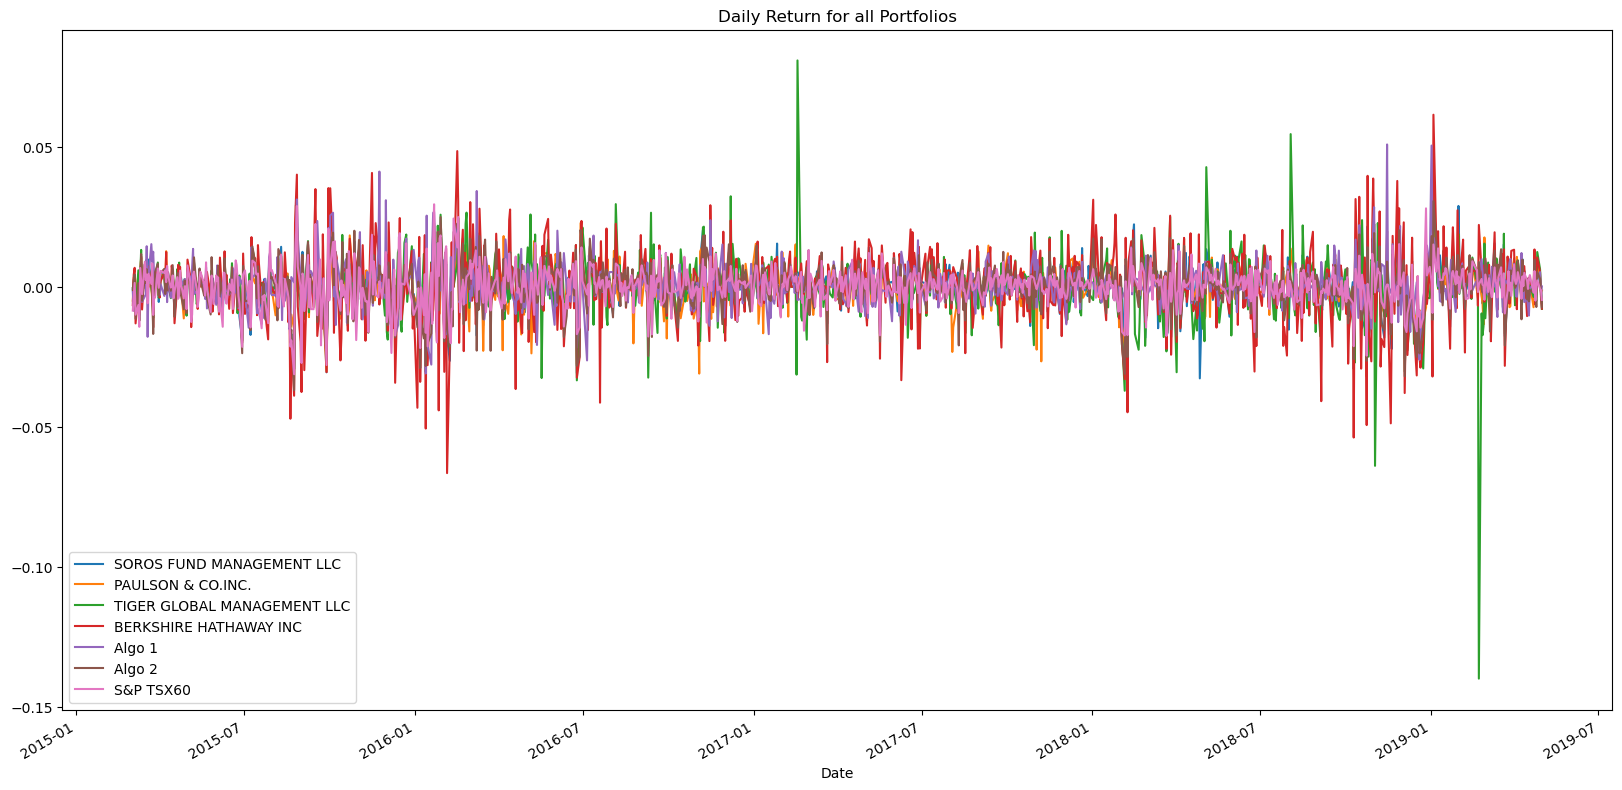

In [99]:
# Plot daily returns of all portfolios
ax=combined_df.plot(figsize = (20,10), title="Daily Return for all Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio cumulative return'}, xlabel='Date'>

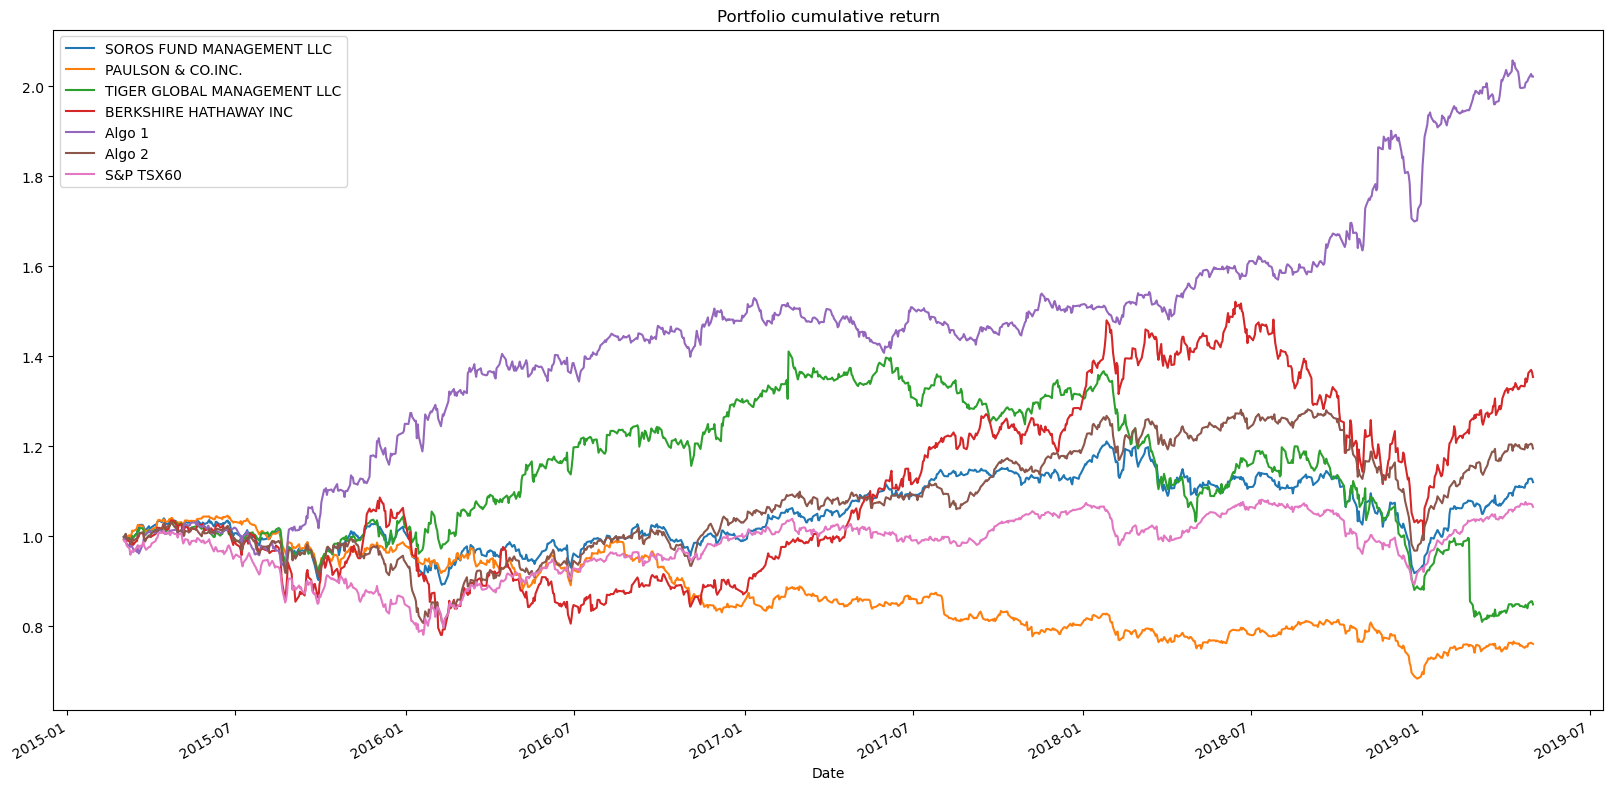

In [100]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + combined_df).cumprod() 
# Plot cumulative returns
cum_returns.plot(figsize = (20,10),title='Portfolio cumulative return')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

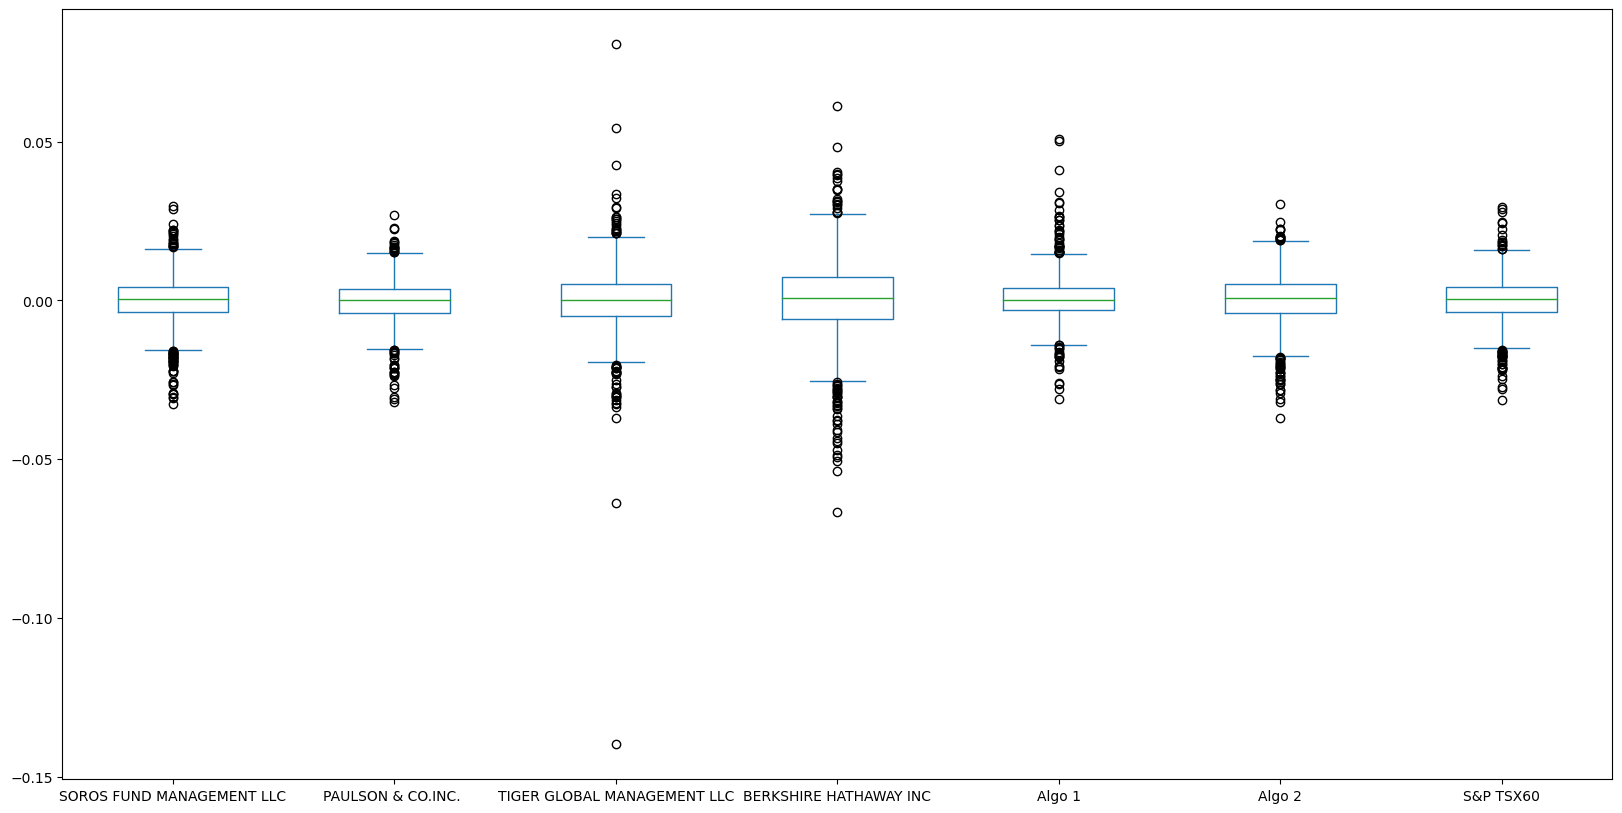

In [101]:
# Box plot to visually show risk
combined_df.plot(kind='box', figsize = (20,10))

### Calculate Standard Deviations

In [102]:
# Calculate the daily standard deviations of all portfolios
standard_deviation = combined_df.std()
standard_deviation.head(10)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX60                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60


Algo 1 SOROS FUND MANAGEMENT LLC 0.007828 Algo 2 0.008326 TIGER GLOBAL MANAGEMENT LLC 0.010883 BERKSHIRE HATHAWAY INC 0.012826 


### Calculate the Annualized Standard Deviation

In [103]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = combined_df.std()* np.sqrt(252)
annualized_standard_deviation.head(10)
annualized_standard_deviation.sort_values()

PAULSON & CO.INC.              0.110841
S&P TSX60                      0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling statistics for all portfolios'}, xlabel='Date'>

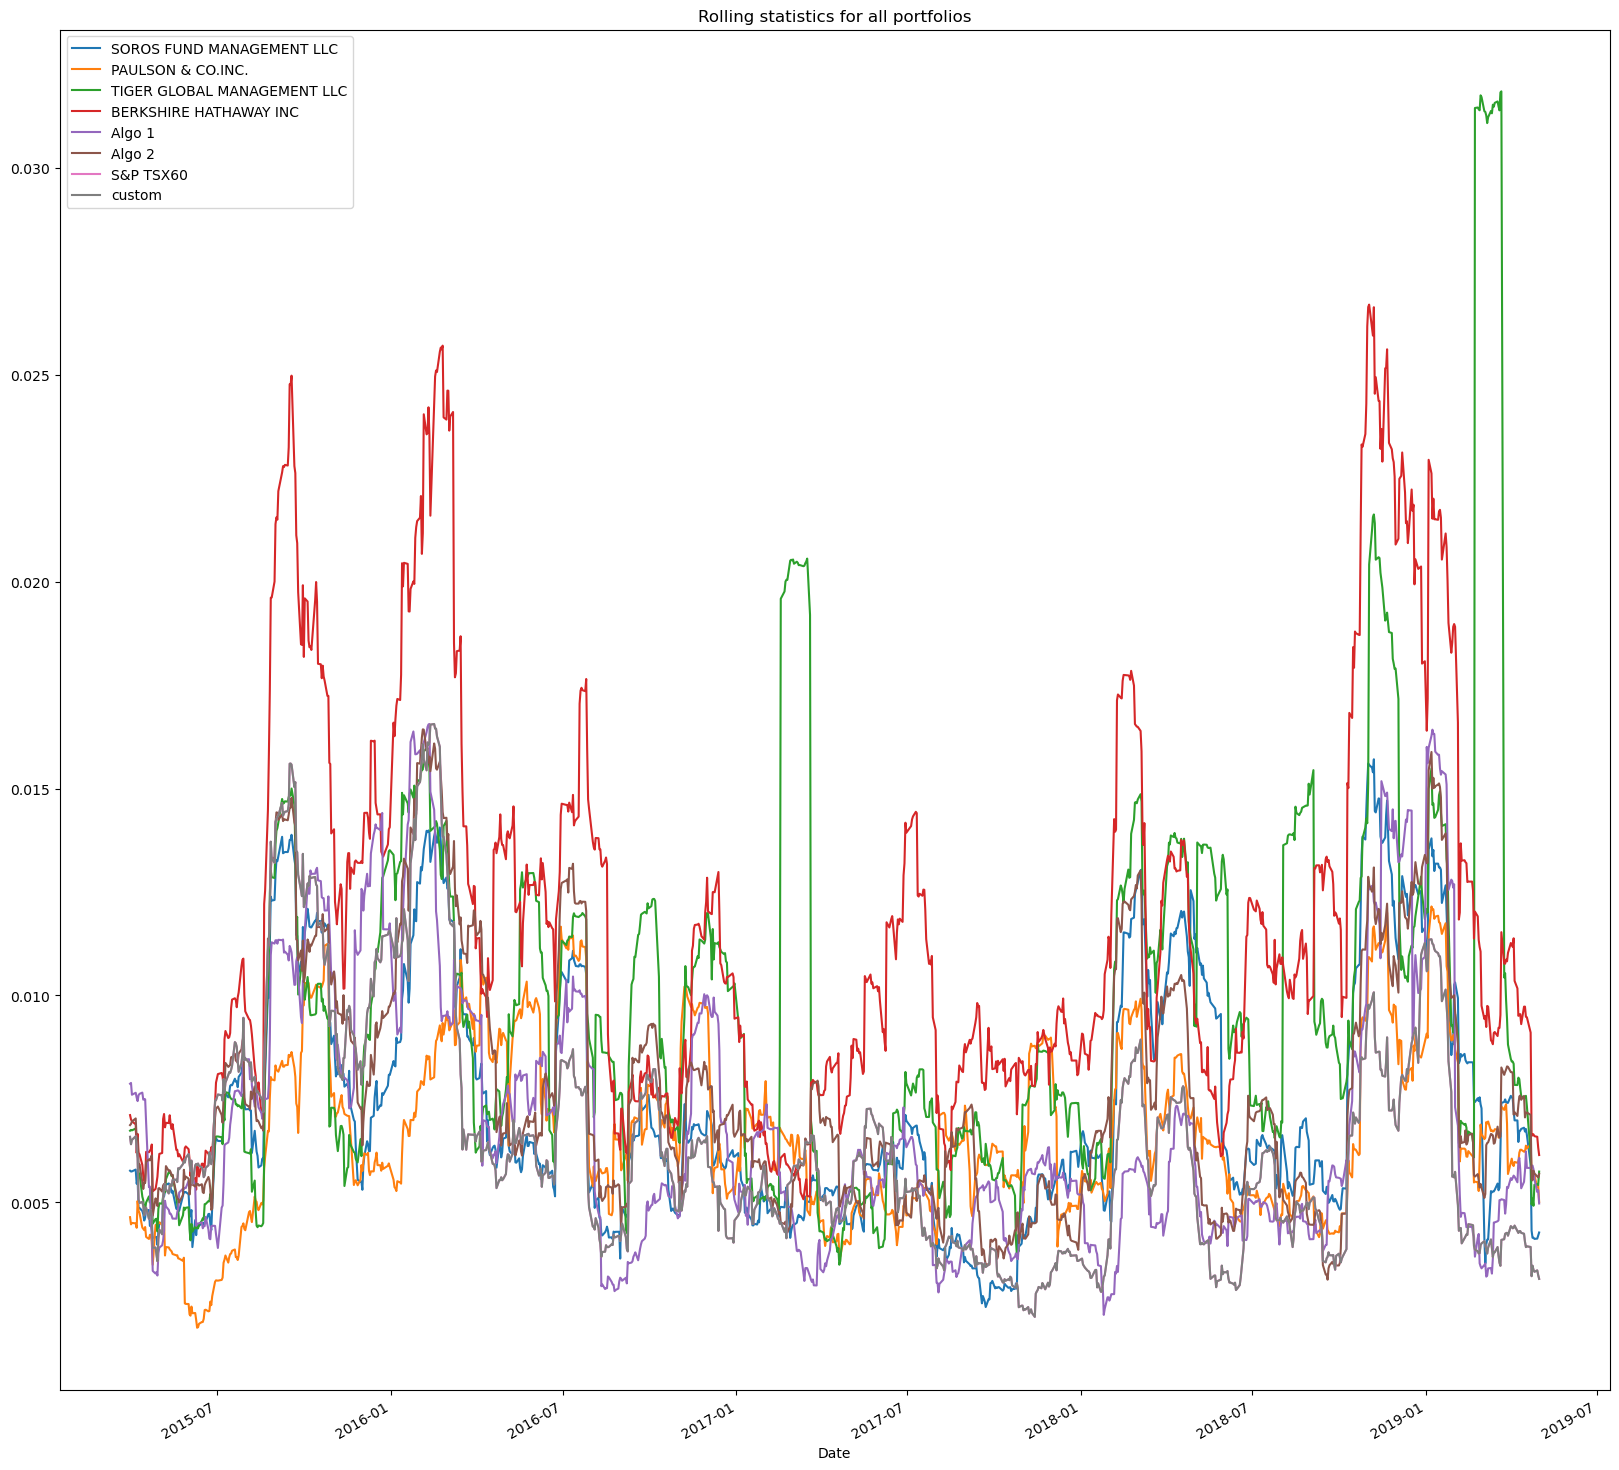

In [153]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21_days = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_21_days.plot(figsize = (20,20), title = "Rolling statistics for all portfolios")

### Calculate and plot the correlation

<AxesSubplot:>

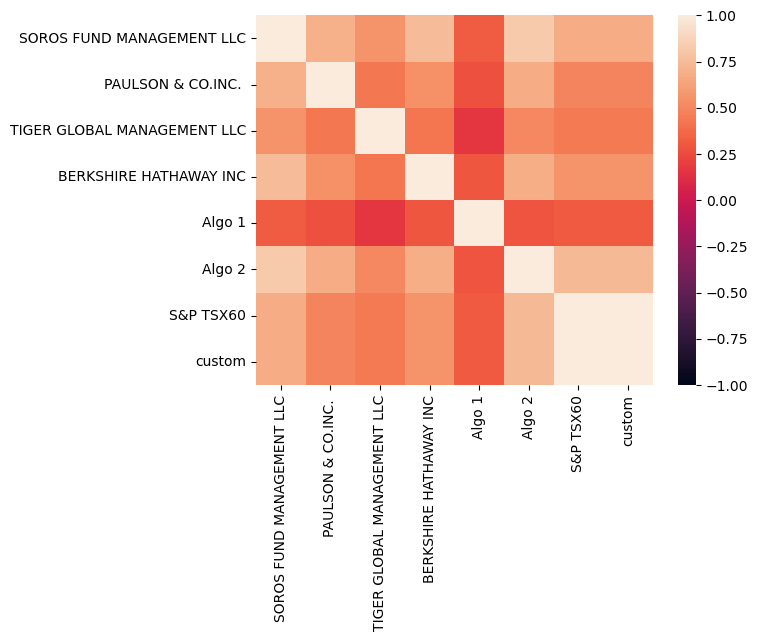

In [154]:
# Calculate the correlation of the combined dataframe
price_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

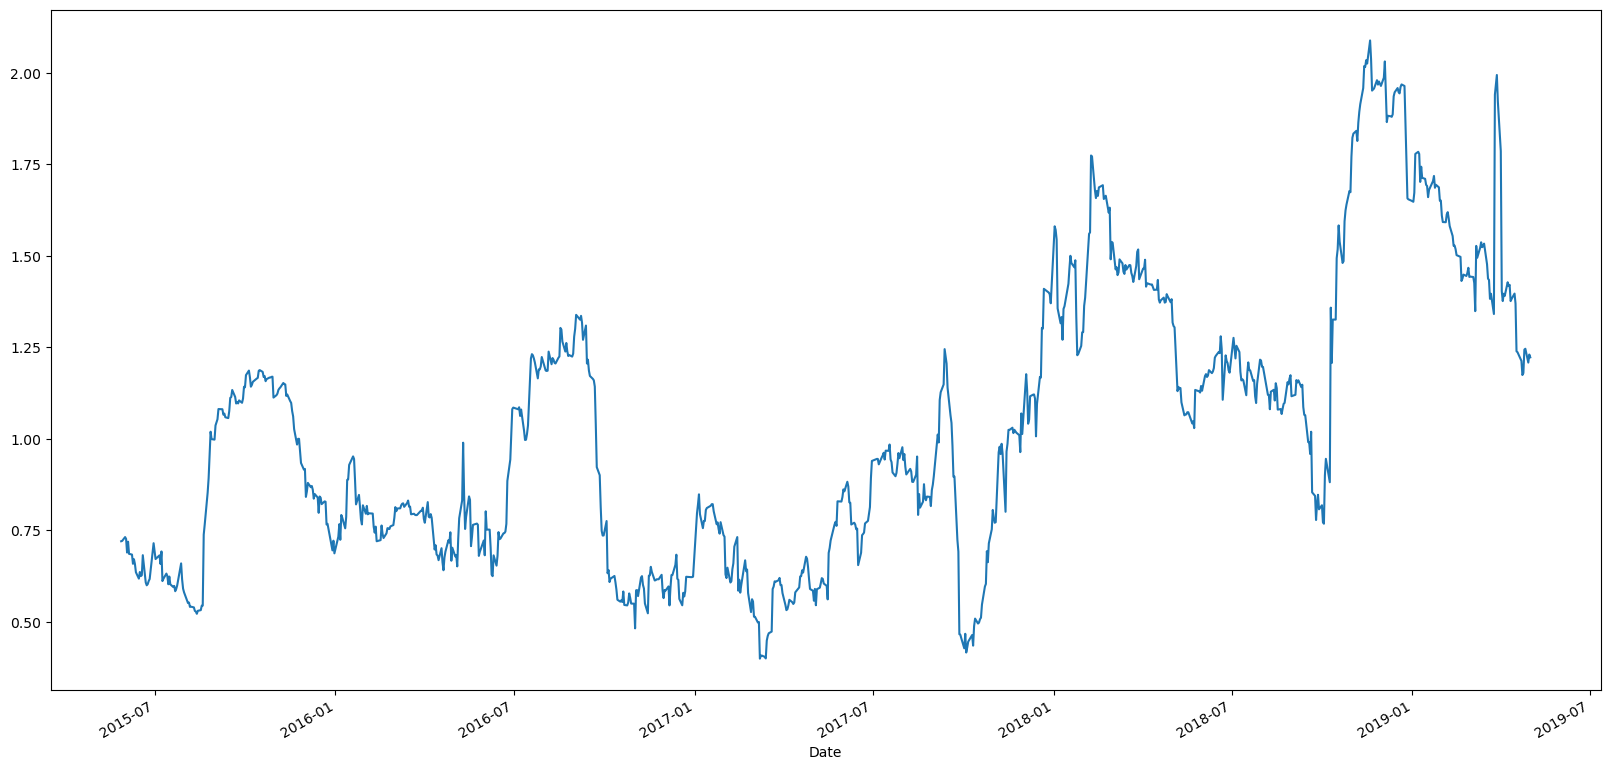

In [155]:
# Calculate covariance of a single portfolio
convariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df["S&P TSX60"])
# Calculate variance of S&P TSX
TSX60_variance = combined_df["S&P TSX60"].rolling(window=60).var()
#computing Beta
comp_beta = convariance /TSX60_variance

comp_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window
ewm_window = rolling_std_21_days.ewm(span=21).mean()
ewm_window


SyntaxError: positional argument follows keyword argument (4294695490.py, line 2)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [108]:
# Annualized Sharpe Ratios
sharp_ratio = combined_df.mean() / combined_df.std()
annualized_sharp_ratio = sharp_ratio*252**.5
annualized_sharp_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX60                      0.195550
dtype: float64

<AxesSubplot:>

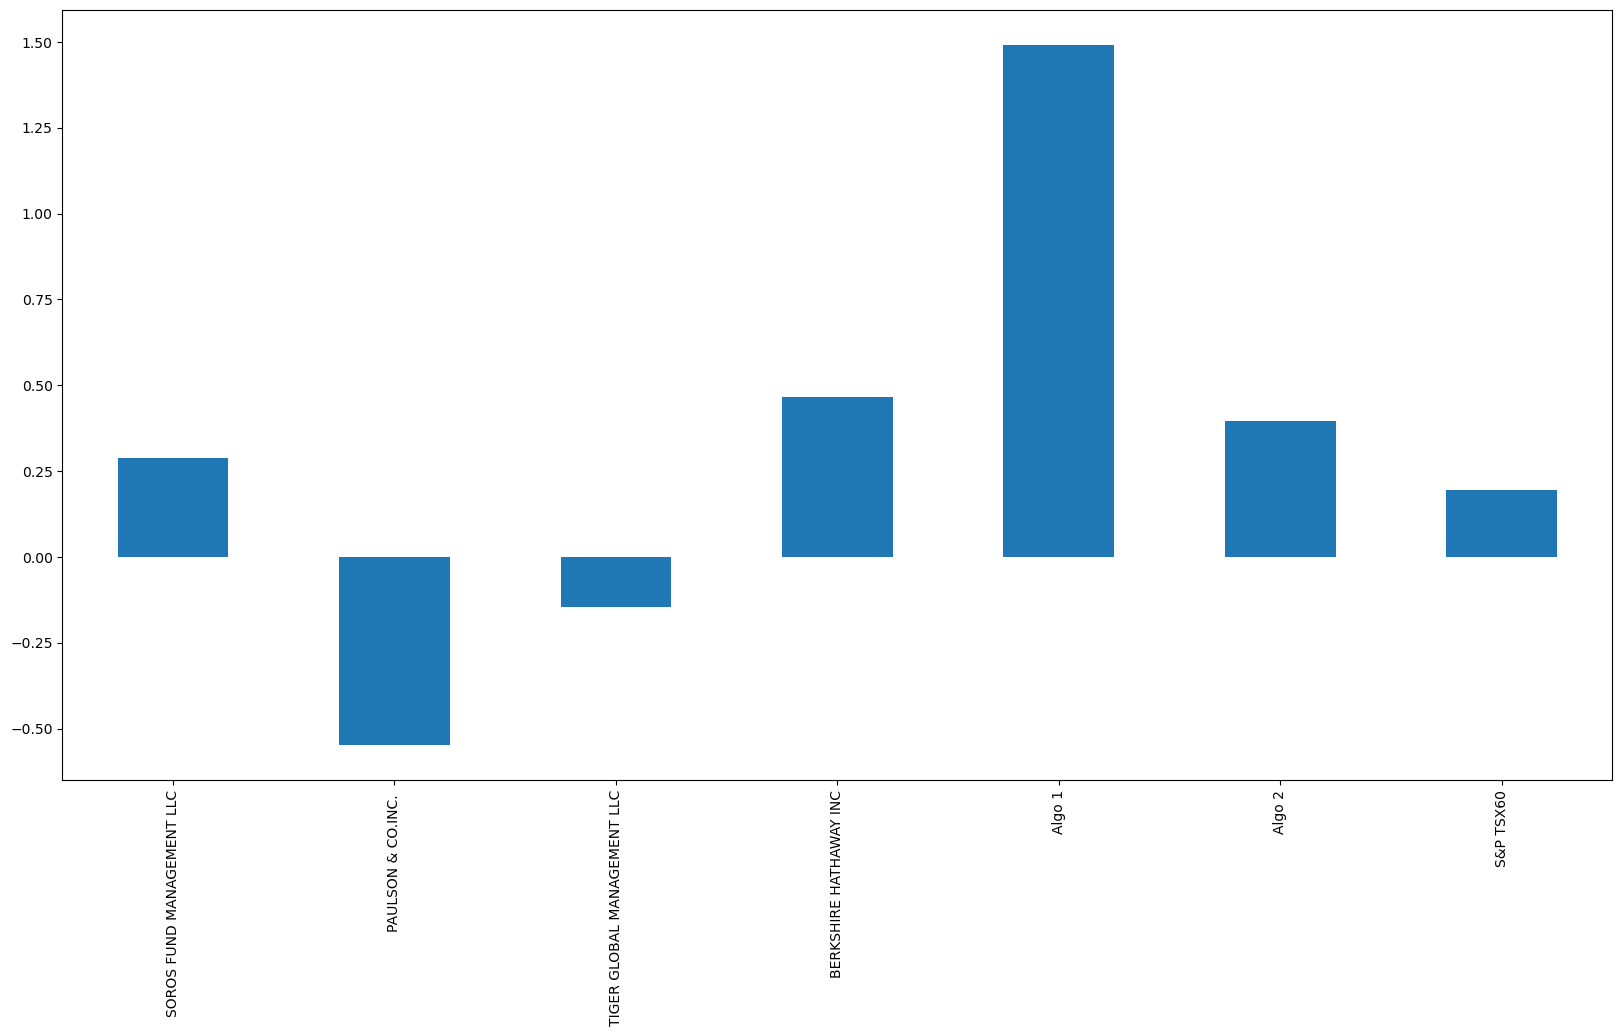

In [109]:
# Visualize the sharpe ratios as a bar plot
annualized_sharp_ratio.plot(kind='bar', figsize=(20,10))

 Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.


#The Algorithmic portfolio and particulary (Algo 1) outperforms both the S&P TSX and Whales Portfolio because it has a higher sharp ratio and low Standard deviation meaning it less rick and good return.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [110]:
# Reading data from 1st stock and configuring the date
tpx_df = pd.read_csv(r"C:\Users\Yvonne Colangelo\Downloads\TPX - Sheet2.csv", infer_datetime_format = True)

tpx_df['Date'] = pd.to_datetime(tpx_df['Date'], errors= 'coerce')

tpx_df['Date'] = tpx_df['Date'].dt.date

tpx_df.set_index('Date', inplace=True)
tpx_df.sort_index()
tpx_df.head()

Close
Date             
2015-03-03  14.38
2015-04-03  14.30
2015-05-03  14.21
2015-06-03  13.93
2015-09-03  13.96

In [111]:
# Reading data from 2nd stock and configuring the date
aap_df = pd.read_csv(r"C:\Users\Yvonne Colangelo\Downloads\Untitled spreadsheet - Sheet1.csv",infer_datetime_format = True)

aap_df['Date'] = pd.to_datetime(aap_df['Date'],errors='coerce')

aap_df['Date'] = aap_df['Date'].dt.date
aap_df.set_index('Date', inplace=True)
aap_df.sort_index()
aap_df.head()


Close
Date              
2015-03-03  154.47
2015-04-03  150.83
2015-05-03  152.52
2015-06-03  149.07
2015-09-03  148.29

In [112]:
# Reading data from 3rd stock and configuring the date
bats_df =pd.read_csv(r"C:\Users\Yvonne Colangelo\Downloads\BATS - Sheet3.csv", infer_datetime_format = True)

bats_df['Date'] = pd.to_datetime(bats_df['Date'],errors='coerce')
bats_df['Date'] = bats_df['Date'].dt.date


bats_df.set_index('Date', inplace=True)
bats_df.sort_index()
bats_df.head()

Close
Date              
2015-03-03  3767.0
2015-04-03  3813.0
2015-05-03  3892.5
2015-06-03  3825.5
2015-09-03  3756.0

In [113]:
# Combine all custom stocks in a single DataFrame
combined_stocks = pd.concat([aap_df, bats_df, tpx_df], axis = "columns", join="inner")
combined_stocks.head()

Close   Close  Close
Date                             
2015-03-03  154.47  3767.0  14.38
2015-04-03  150.83  3813.0  14.30
2015-05-03  152.52  3892.5  14.21
2015-06-03  149.07  3825.5  13.93
2015-09-03  148.29  3756.0  13.96

In [114]:
# Reset Date index
combined_stocks.reset_index()

Date   Close   Close  Close
0    2015-03-03  154.47  3767.0  14.38
1    2015-04-03  150.83  3813.0  14.30
2    2015-05-03  152.52  3892.5  14.21
3    2015-06-03  149.07  3825.5  13.93
4    2015-09-03  148.29  3756.0  13.96
..          ...     ...     ...    ...
492  2017-02-24  157.33  5070.0  11.49
493  2017-02-27  156.94  5092.0  11.61
494  2017-02-28  156.61  5080.0  11.55
495  2017-01-03  156.68  5161.0  11.81
496  2017-02-03  157.36  5155.0  11.45

[497 rows x 4 columns]

In [115]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.columns = ['AAP', 'BATS', 'TPX']
combined_stocks.head()

AAP    BATS    TPX
Date                             
2015-03-03  154.47  3767.0  14.38
2015-04-03  150.83  3813.0  14.30
2015-05-03  152.52  3892.5  14.21
2015-06-03  149.07  3825.5  13.93
2015-09-03  148.29  3756.0  13.96

In [116]:
# Calculate daily returns for custom porfolio
daily_returns = combined_stocks.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.head()

AAP      BATS       TPX
Date                                    
2015-04-03 -0.023564  0.012211 -0.005563
2015-05-03  0.011205  0.020850 -0.006294
2015-06-03 -0.022620 -0.017213 -0.019704
2015-09-03 -0.005232 -0.018168  0.002154
2015-10-03 -0.011869 -0.027556  0.002865

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [117]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return using the weights
portfolio_return =daily_returns.dot(weights)
portfolio_return
# Display sample data


Date
2015-04-03   -0.005639
2015-05-03    0.008587
2015-06-03   -0.019846
2015-09-03   -0.007082
2015-10-03   -0.012186
                ...   
2017-02-24   -0.005307
2017-02-27    0.004101
2017-02-28   -0.003209
2017-01-03    0.012968
2017-02-03   -0.009102
Length: 496, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [118]:
# Join your returns DataFrame to the original returns DataFrame
combined_df["custom"] = daily_return
combined_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2  S&P TSX60    custom  
Date                                       
2015-03-03 -0.000949  -0.008530 -0.008530  
2015-03-04  0.002416  -0.003371 -0.003371  
2015-03-05  0.004323   0.001344  0.001344  
2015-03-06 -0.011460  -0.009972 -0.009972  
2015-03-09  0.001303  -0.006555 -0.006555  
...              ...        ...       ...  
2019-04-25 -0.007247  -0.000628 -0.000628  
2019-04-26  0.005256   0.002254  0.002254  
2019-04-29  0.002829  -0.000788 -0.000788  
2019-04-30 -0.001570  -0.001183 -0.001183  
2019-05-01 -0.007358  -0.004703 -0.004703  

[1029 rows x 8 columns]

In [119]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna()
combined_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2  S&P TSX60    custom  
Date                                       
2015-03-03 -0.000949  -0.008530 -0.008530  
2015-03-04  0.002416  -0.003371 -0.003371  
2015-03-05  0.004323   0.001344  0.001344  
2015-03-06 -0.011460  -0.009972 -0.009972  
2015-03-09  0.001303  -0.006555 -0.006555  
...              ...        ...       ...  
2019-04-25 -0.007247  -0.000628 -0.000628  
2019-04-26  0.005256   0.002254  0.002254  
2019-04-29  0.002829  -0.000788 -0.000788  
2019-04-30 -0.001570  -0.001183 -0.001183  
2019-05-01 -0.007358  -0.004703 -0.004703  

[1029 rows x 8 columns]

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [120]:
# Calculate the annualized `std`
annual_standard_deviation = combined_df.std()* np.sqrt(252)
annual_standard_deviation.head(10)
annual_standard_deviation.sort_values()

PAULSON & CO.INC.              0.110841
S&P TSX60                      0.111664
custom                         0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling statistics for all portfolios'}, xlabel='Date'>

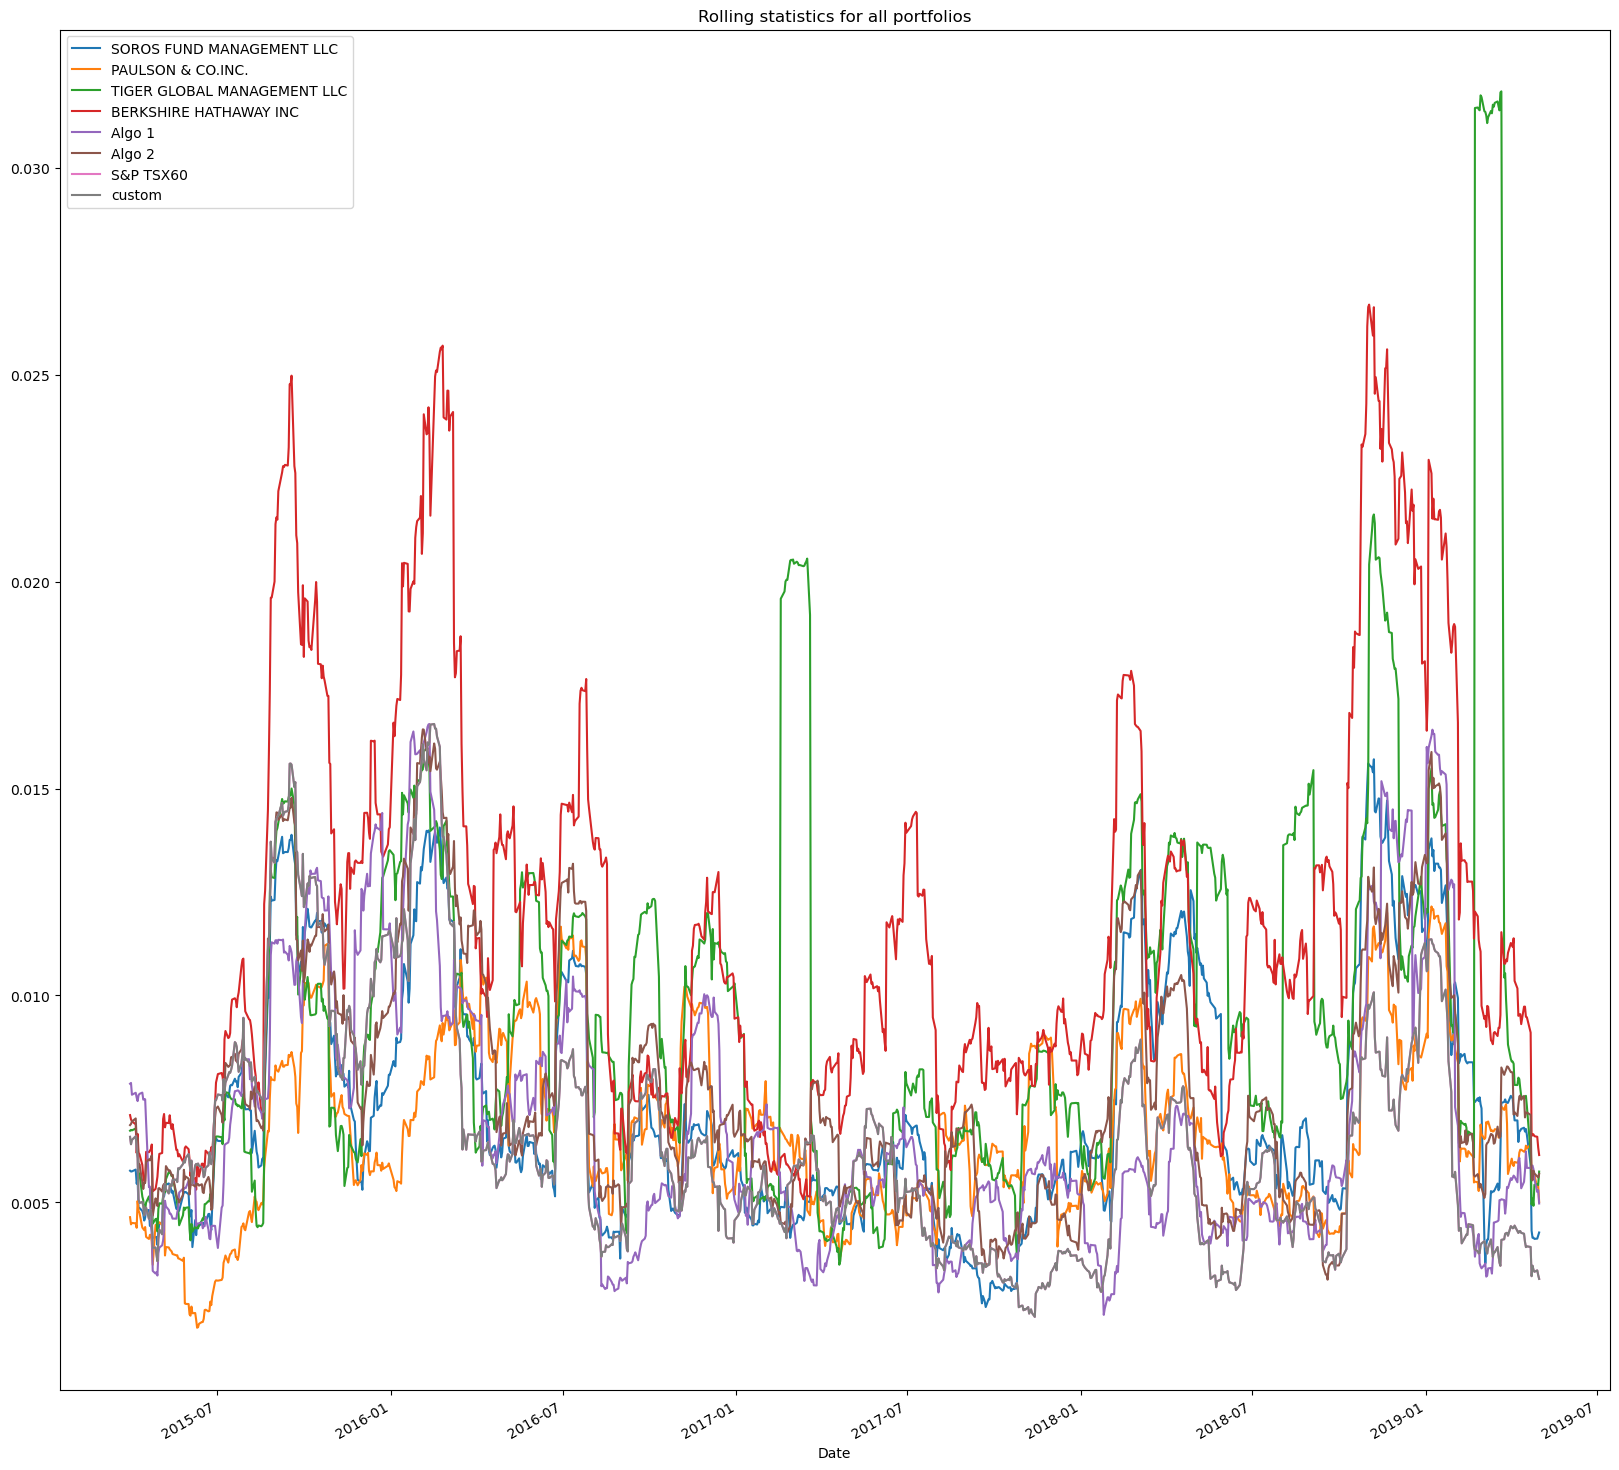

In [121]:
# Calculate rolling standard deviation
rolling_std_21_days = combined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_21_days.plot(figsize = (20,20), title = "Rolling statistics for all portfolios")

### Calculate and plot the correlation

<AxesSubplot:>

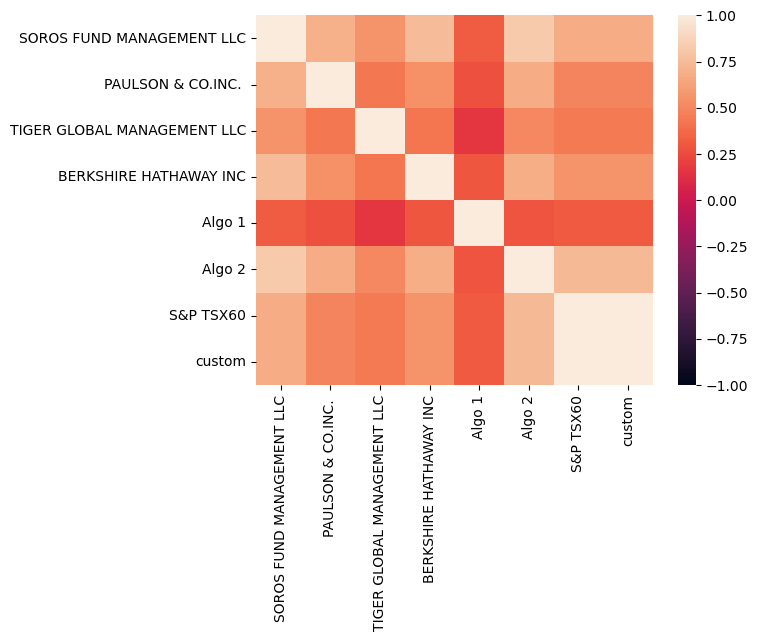

In [122]:
# Calculate and plot the correlation
joined_corr = combined_df.corr()
sns.heatmap(joined_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.781461   
PAULSON & CO.INC.                             0.621802            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.779915            0.674936   
BERKSHIRE HATHAWAY INC                        1.229174            0.991962   
Algo 1                                        0.304226            0.289503   
Algo 2                                        0.879343            0.803757   
S&P TSX60                                     0.605620            0.490124   
custom                                        0.605620            0.490124   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.403480   
PAULSON & CO.INC.                               0.277832   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.499129   
Algo 1                                          0.112435   
Algo 2                                          0.387665   
S&P TSX60                                       0.284774   
custom                                          0.284774   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.457845  0.323665  0.777146   
PAULSON & CO.INC.                          0.293999  0.245074  0.565216   
TIGER GLOBAL MANAGEMENT LLC                0.359371  0.231220  0.662256   
BERKSHIRE HATHAWAY INC                     1.000000  0.489061  1.054538   
Algo 1                                     0.171226  1.000000  0.260172   
Algo 2                                     0.444450  0.313195  1.000000   
S&P TSX60                                  0.305625  0.287596  0.622936   
custom                                     0.305625  0.287596  0.622936   

                             S&P TSX60    custom  
SOROS FUND MANAGEMENT LLC     0.749945  0.749945  
PAULSON & CO.INC.             0.482925  0.482925  
TIGER GLOBAL MANAGEMENT LLC   0.681640  0.681640  
BERKSHIRE HATHAWAY INC        1.016044  1.016044  
Algo 1                        0.334745  0.334745  
Algo 2                        0.872827  0.872827  
S&P TSX60                     1.000000  1.000000  
custom                        1.000000  1.000000

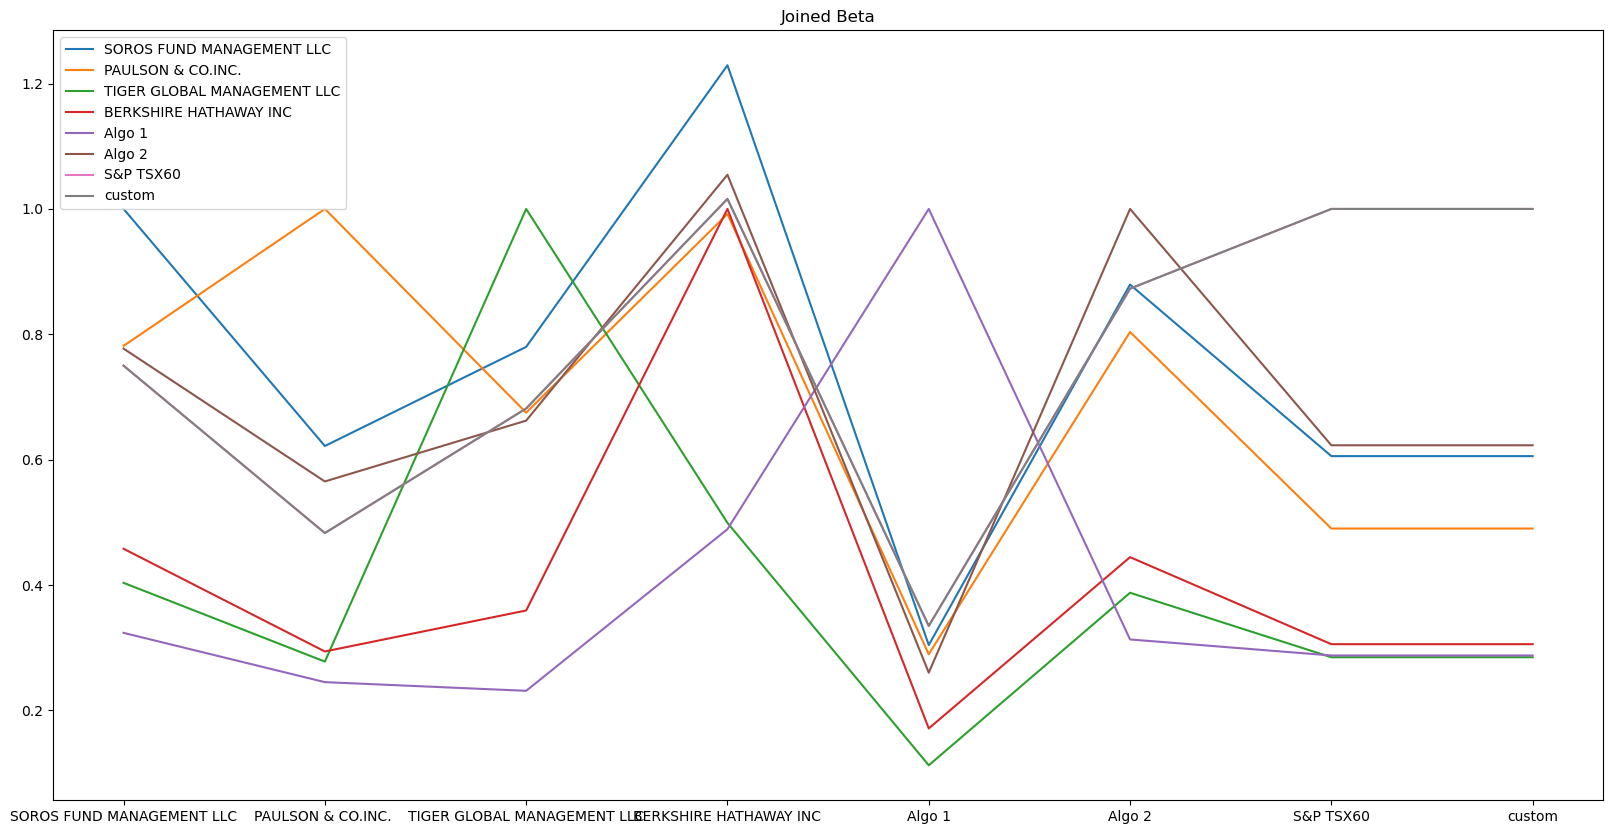

In [123]:
# Calculate and plot Beta for the joined dataframe
joined_beta = combined_df.cov() / combined_df.var()
joined_beta.plot(figsize = (20,10), title= "Joined Beta")
joined_beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [124]:
# Calculate Annualized Sharpe Ratios
joined_sharp_ratio = combined_df.mean() / combined_df.std()

#annualizing the sharp ratio
joined_sharp_ratio = joined_sharp_ratio*252**.5
joined_sharp_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX60                      0.195550
custom                         0.195550
dtype: float64

<AxesSubplot:title={'center':'joined visualised sharp ratio'}>

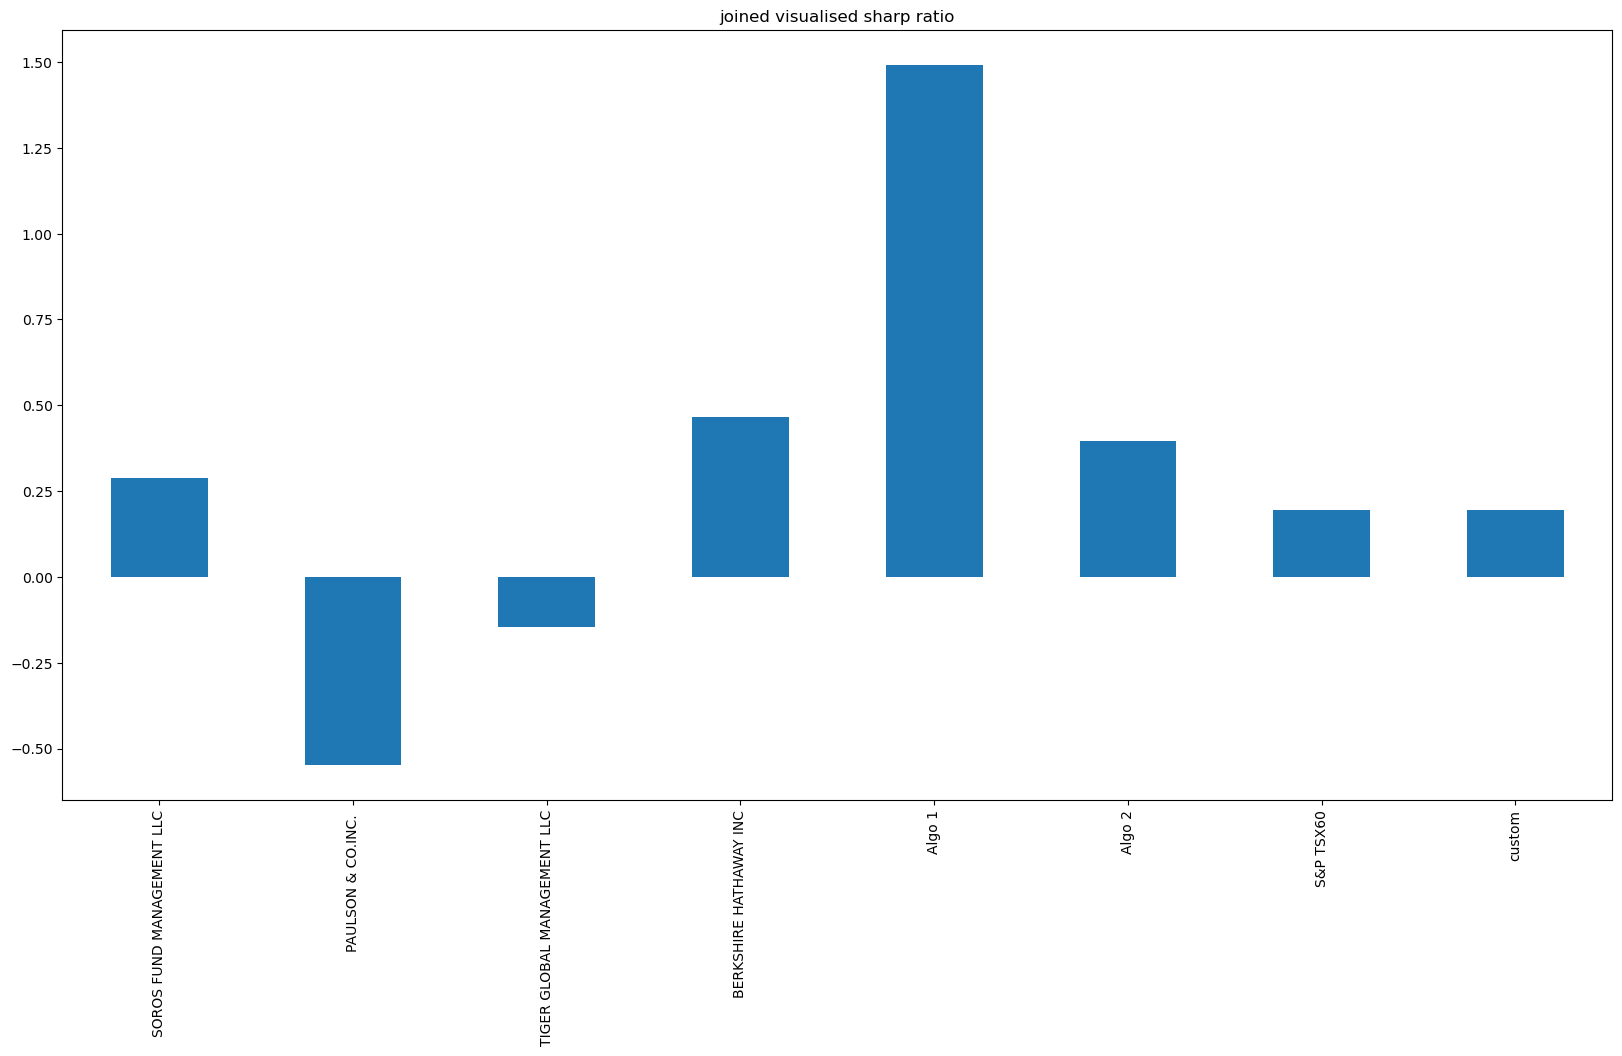

In [125]:
# Visualize the sharpe ratios as a bar plot
joined_sharp_ratio.plot(figsize = (20,10),kind="bar", title = "joined visualised sharp ratio")

### How does your portfolio do?

My Custom portfolio is comparable to the S&P TXS60. IT contains high risk stocks but also low risk stocks to average it out. Its Standard deviation and sharp ratio are comparable to the S&P TSX60 making it less volatile and less risky.  